In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Generic functions

In [2]:
def add_noise(y):
    """
    Adds random noise to a set of points
    """
    noise_func = np.vectorize(lambda x: x + np.random.uniform(-np.max(y)/4, np.max(y)/4, 1))
    return noise_func(y)

# Generating Linear Data

In [3]:
def generate_linear_points(start, stop, number, a=3, b=6, c=15 ):
    """
    Generates points along a line with the equation
    y = mx + b (parent function)
    y = a(x^2) + bx +c
    """
    x = np.linspace(start, stop, num=number)
    linear_function = np.vectorize(lambda x: a*(x*x) + (b*x) + c )
    y = linear_function(x)
    return (x, y)

In [4]:
def get_linear_y_values(X, a=None, b=None, c=None):
    return a*(X*X) + (b*X) + c

In [5]:
## Generate points on a line with x values between 1 and 50
## with a = 1 and b = 6 and c = 10
X, _Y = generate_linear_points(0, 50, 100, a=1, b=6, c=10)
## Add random noise to the y values
Y = add_noise(_Y)

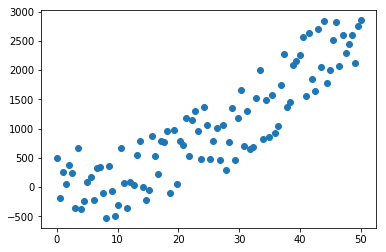

In [8]:
plt.scatter(X, Y)

# Determining Gradients

Lets define a Square loss function as, where $Y$ is the real value and $mx + b$ or $\hat{Y}$ is the predicted value and $n$ is the number of points in the data

$$L = \sum_{i=0}^{n}{(Y_i - ax_i^2 - bx_i -c)^2}$$

then the partial differntials with respect to $m$ and $b$ are the following

$$\frac{\delta L}{\delta a} = \sum_{i=0}^{n}{2x_i^2 (ax_i^2 + bx_i + c - Y_i)}$$

and

$$\frac{\delta L}{\delta b} = \sum_{i=0}^{n}{2x_i (ax_i^2 + bx_i + c - Y_i)}$$

and

$$\frac{\delta L}{\delta c} = \sum_{i=0}^{n}{2 (ax_i^2 + bx_i + c - Y_i)}$$

the three functions can be re-written as 

$$\frac{\delta L}{\delta a} = \sum_{i=0}^{n}{2x_i^2 (\hat{Y_i} - Y_i)}$$

$$\frac{\delta L}{\delta b} = \sum_{i=0}^{n}{2x_i(\hat{Y_i} - Y_i)}$$

$$\frac{\delta L}{\delta c} = \sum_{i=0}^{n}{2(\hat{Y_i} - Y_i)}$$

#### you can find partial derivatives for virutally any function that you can think of using https://www.wolframalpha.com/examples/math/calculus/

In [305]:
def get_linear_gradients_mse(X, Y, Y_hat):
    """
    returns gradients for the three variables a, b and c assuming mean square error
    for a quadratic equation y = a(x^2) + bx + c
    """
    # dL/da
    a_gradient = np.sum(2*(X**2)*(Y_hat - Y))/len(Y) 
    # dL/db
    b_gradient = np.sum(2*X*(Y_hat - Y))/len(Y)
    # dL/dc
    c_gradient = np.sum(2*(Y_hat - Y))/len(Y)
    return a_gradient, b_gradient, c_gradient

# Minimization

Estimates after 1000000 iterations: a = 0.939096535619, b = 6.7575984965, c = 30.7514307406


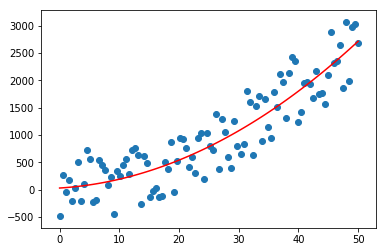

In [306]:
# Initial Values
a = 10
b = 15
c = 30
# Learning rate
alpha = 0.0000001
# Number of iterations
N = 1000000
for i in range(N):
    Y_hat = get_linear_y_values(X, a, b, c)
    a_grad, b_grad, c_grad = get_linear_gradients_mse(X, Y, Y_hat)
    # update a,b,c for the next iteration
    a = a - alpha * a_grad
    b = b - alpha * b_grad
    c = c - alpha * c_grad
# The final value of 
plt.plot(X, get_linear_y_values(X, a, b, c), 'r')
plt.scatter(X, Y)
print "Estimates after {} iterations: a = {}, b = {}, c = {}".format(N, a, b, c)

You can play around with the `initial values`, `learning rate`, `number of iterations` etc 
to get an idea of how gradient descent works in practice. 

# Same problem using different loss function

# Determining Gradients (Binomial logistic loss)

Lets define a Binomial logistic loss function as, where $Y$ is the real value and $ax^2 + bx + c$ or $\hat{Y}$ is the predicted value and $n$ is the number of points in the data

$$L = \sum_{i=0}^{n}{-Y_i log(ax^2 + bx + c) - (1-Y_i) log(1-(ax^2 + bx + c))}$$

then the partial differntials with respect to $a$, $b$ and $c$ are the following

$$\frac{\delta L}{\delta b} = \sum_{i=0}^{n}{\frac{x_i^2 (ax_i^2 + bx_i + c - Y_i)}{(1-ax_i^2 + bx_i + c)(ax_i^2 + bx_i + c)}}$$

and

$$\frac{\delta L}{\delta b} = \sum_{i=0}^{n}{\frac{x_i (ax_i^2 + bx_i + c - Y_i)}{(1-ax_i^2 + bx_i + c)(ax_i^2 + bx_i + c)}}$$

and

$$\frac{\delta L}{\delta b} = \sum_{i=0}^{n}{\frac{ (ax_i^2 + bx_i + c - Y_i)}{(1-ax_i^2 + bx_i + c)(ax_i^2 + bx_i + c)}}$$

the three functions can be re-written as 

$$\frac{\delta L}{\delta a} = \sum_{i=0}^{n}{\frac{x_i^2 (\hat{Y_i} - Y_i)}{(1-\hat{Y_i})\hat{Y_i}}}$$

$$\frac{\delta L}{\delta a} = \sum_{i=0}^{n}{\frac{x_i (\hat{Y_i} - Y_i)}{(1-\hat{Y_i})\hat{Y_i}}}$$

$$\frac{\delta L}{\delta a} = \sum_{i=0}^{n}{\frac{ (\hat{Y_i} - Y_i)}{(1-\hat{Y_i})\hat{Y_i}}}$$

In [20]:
def get_linear_y_values_2(X, a2=None, b2=None, c2=None):
    return a2*(X*X) + (b2*X) + c2

In [21]:
def get_linear_gradients_mse_2(X, Y, Y_hat):
    """
    returns gradients for the three variables a, b and c using binomial logistic loss 
    for a quadratic equation y = a(x^2) + bx + c
    """
    # dL/da
    a_gradient = np.sum(((X**2)*(Y_hat - Y))/((1-Y_hat)*Y_hat)) 
    # dL/db
    b_gradient = np.sum((X*(Y_hat - Y))/((1-Y_hat)*Y_hat))
    # dL/dc
    c_gradient = np.sum(((Y_hat - Y))/((1-Y_hat)*Y_hat))
    return a_gradient, b_gradient, c_gradient

Estimates after 100000 iterations: a = 1.01195556873, b = 4.98977728184, c = 9.9412700523


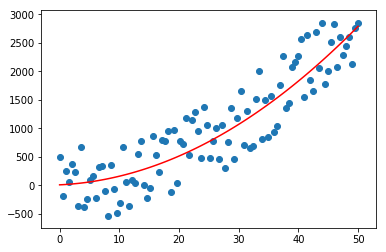

In [32]:
# Initial Values
a2 = 1
b2 = 5
c2 = 10
# Learning rate
alpha2 = 0.0000001
# Number of iterations
N2 = 100000
for i in range(N2):
    Y_hat = get_linear_y_values_2(X, a2, b2, c2)
    a_grad2, b_grad2, c_grad2 = get_linear_gradients_mse_2(X, Y, Y_hat)
    # update a,b,c for the next iteration
    a2 = a2 - alpha2 * a_grad2
    b2 = b2 - alpha2 * b_grad2
    c2 = c2 - alpha2 * c_grad2
# The final value of 
plt.plot(X, get_linear_y_values(X, a2, b2, c2), 'r')
plt.scatter(X, Y)
print "Estimates after {} iterations: a = {}, b = {}, c = {}".format(N2, a2, b2, c2)